In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown
from scipy import stats

'''Seaborn and Matplotlib Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
%matplotlib inline
from DataFrameImputer import DataFrameImputer as DFI
'''plotly Visualization'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from sklearn.base import TransformerMixin
%time

from sklearn.impute import KNNImputer as knn_impute
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


import pandas as pd
from keras.optimizers import SGD
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.naive_bayes import MultinomialNB

import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression



Wall time: 0 ns


Using TensorFlow backend.


In [2]:
Dataset=pd.read_csv(r'C:\Users\Home\Documents\Blue Claw Project\Sample Data.csv')
Dataset_sorted=Dataset.sort_values(['Keyword','Position'], ascending=[True,False])

#Dataset_sorted=Dataset_sorted.drop_duplicates(['Keyword'], keep='first')

display(print('Dimension of data:', Dataset.shape))

Dimension of data: (50000, 15)


None

In [3]:
Dataset.describe()

Position  Previous position  Search Volume  Keyword Difficulty  \
count  50000.000000       50000.000000   5.000000e+04        50000.000000   
mean      20.143320          19.698940   8.186226e+02           84.547969   
std       24.843956          24.677414   1.531690e+04            6.841823   
min        1.000000           0.000000   5.000000e+01           28.700000   
25%        3.000000           3.000000   7.000000e+01           81.410000   
50%        9.000000           9.000000   9.000000e+01           85.920000   
75%       27.000000          26.000000   1.700000e+02           89.270000   
max      100.000000         100.000000   1.830000e+06          100.000000   

                CPC        Traffic   Traffic (%)   Traffic Cost  Competition  \
count  50000.000000   50000.000000  50000.000000   50000.000000  50000.00000   
mean       0.465816      62.385280      0.001524      62.735040      0.27582   
std        7.666165    1975.052737      0.063189    4266.832526      0.37460   
min        0.000000       0.000000      0.000000       0.000000      0.00000   
25%        0.000000       0.000000      0.000000       0.000000      0.00000   
50%        0.000000       2.000000      0.000000       0.000000      0.04000   
75%        0.000000       8.000000      0.000000       0.000000      0.51000   
max      421.080000  294400.000000      9.430000  683008.000000      1.00000   

       Number of Results     Timestamp  
count       5.000000e+04  5.000000e+04  
mean        2.231007e+08  1.593619e+09  
std         1.151052e+09  7.407045e+05  
min         0.000000e+00  1.592294e+09  
25%         1.860000e+05  1.592981e+09  
50%         5.670000e+06  1.593632e+09  
75%         5.110000e+07  1.594295e+09  
max         2.527000e+10  1.594769e+09

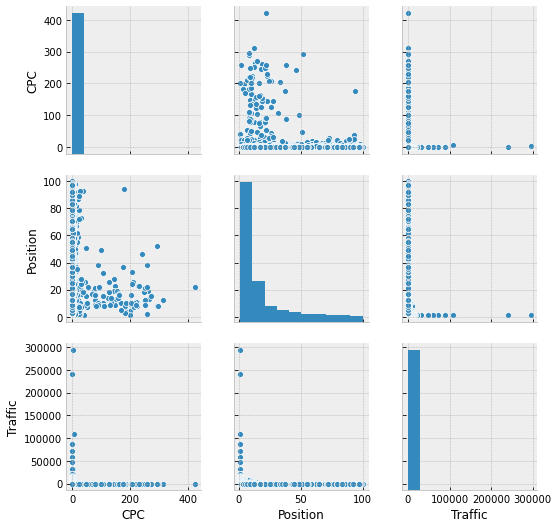

In [4]:
hello=Dataset[['CPC','Position','URL','Traffic']]
sns.pairplot(hello);

In [8]:
##### Keeping the first values of the dataframe ##### 

#### Wouldn't do this if they were important to findings (would have aggregated instead if important), 
#### only done to ease the process for this task #######

df_sorted=Dataset_sorted.drop_duplicates(['URL'], keep='first')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
URLS=list(set(df_sorted.URL))

##### Implementing Tokens for the words in the list: Tokenizer uses the words/sentences in the 
##### list to identify : Use the oov_token to replace words it doesn't recognize with out of words
###### vocabulary
tokenizer=Tokenizer(num_words=100,oov_token='<OOV>')
tokenizer.fit_on_texts(URLS)
word_index=tokenizer.word_index

####### Using the texts_to_sequence class: create sequences of tokens representing each sentence
sequences=tokenizer.texts_to_sequences(URLS)
padded=pad_sequences(sequences,padding='post',truncating='post',maxlen=5)
padded1= pd.DataFrame(padded)
padded1=padded1.set_axis(['First','Second','Third','Fourth','Fifth'], axis=1, inplace=False)

cols = ['First','Second','Third','Fourth','Fifth']
padded1['URL_ID'] = padded1[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
URL_ID_list=padded1['URL_ID'].to_list()

###### For Later Mapping Create Seperate DataFrames to map 'URL' ##########

URL_ID_info = pd.DataFrame(
        {'URL_ID': URL_ID_list,
         'URL': URLS
        })

#### Wouldn't do this if they were important to findings (would have aggregated instead if important), 
#### only done to ease the process for this task #######

Dataset_sorted=Dataset.sort_values(['Keyword','Position'], ascending=[True,False])
df_sorted=Dataset_sorted.drop_duplicates(['Keyword'], keep='first')
Keyword=list(set(df_sorted.Keyword))
#length=len(Keyword)
##### Implementing Tokens for the words in the list: Tokenizer uses the words/sentences in the 
##### list to identify : Use the oov_token to replace words it doesn't recognize with out of words
###### vocabulary
tokenizer1=Tokenizer(num_words=100)#,oov_token='<OOV>')
tokenizer1.fit_on_texts(Keyword)
word_index=tokenizer1.word_index


Text(0.5, 1.0, 'Top 15 Frequently occuring URLs')

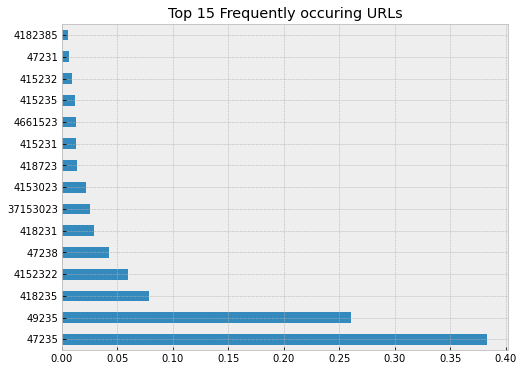

In [7]:
URL_ID_info.URL_ID.value_counts(normalize=True).nlargest(15).plot(kind='barh', figsize=(8, 6))
plt.title('Top 15 Frequently occuring URLs')

In [10]:
####### Using the texts_to_sequence class: create sequences of tokens representing each sentence
sequences1=tokenizer1.texts_to_sequences(Keyword)
padded2=pad_sequences(sequences1,padding='post',truncating='post',maxlen=5)
padded2= pd.DataFrame(padded2)
padded2=padded2.set_axis(['First','Second','Third','Fourth','Fifth'], axis=1, inplace=False)
cols = ['First','Second','Third','Fourth','Fifth']
padded2['Keyword_ID'] = padded2[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
Keyword_id_list=padded2['Keyword_ID'].to_list()
Keyword_id_list

###### For Later Mapping Create Seperate DataFrames to map 'Keyword' ##########
Keyword_id_info = pd.DataFrame(
        {'Keyword_id': Keyword_id_list,
         'Keyword': Keyword
        })

Dataset_sorted1=pd.merge(Dataset_sorted,Keyword_id_info,left_on='Keyword', right_on='Keyword')
Dataset_sorted2=pd.merge(Dataset_sorted1,URL_ID_info,on='URL', how='left')
Dataset_sorted8=Dataset_sorted2
#Dataset_sorted2

Keep_list=['Position','Search Volume','Keyword Difficulty',
          'CPC','Traffic','Traffic Cost','Competition','Number of Results',
          'Keyword_id','URL_ID']

Dataset_sorted2= Dataset_sorted8[Keep_list]

### Arrange the number alphabetically ###
Keyword_id_info['Keyword_ordered'] = Keyword_id_info['Keyword'].apply(lambda x: ' '.join(sorted(x.split())))
Keyword_id_info.Keyword_ordered.str.lower().str.split()

A=[]
from collections import Counter
results = Counter()
Keyword_id_info['Keyword_ordered'].str.lower().str.split().apply(results.update)
A.append(results)
A=pd.DataFrame(A).T
A['Keyword']=A.index
A=A.set_axis(['Count','Keyword'], axis=1, inplace=False).reset_index(drop=True)
A=A.sort_values('Count', ascending=False).reset_index(drop=True)



In [12]:
A

Count   Keyword
0      18515      xbox
1       8709       one
2       3219        to
3       3118      game
4       3022     games
...      ...       ...
10328      1  nectaris
10329      1  rathalos
10330      1   beneath
10331      1   zylbrad
10332      1   tension

[10333 rows x 2 columns]

Keyword
3               ace combat 7 xbox one
11                uno reverse reverse
12              block stolen xbox one
15     xbox one official chat headset
18                     top apex plays
...                               ...
44808              supercars xbox one
44818             hard corps uprising
44820                  ufc redemption
44830                        ssx 2012
44834              thumbstick tension

[11316 rows x 1 columns]

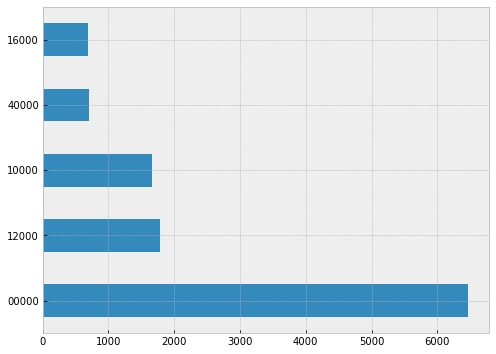

In [11]:
Keyword_id_info.Keyword_id.value_counts().nlargest(5).plot(kind='barh', figsize=(8, 6))
list1=['16000','40000','10000','12000','00000']
Top5=Keyword_id_info[Keyword_id_info.Keyword_id.isin(list1)][['Keyword']]
Top5

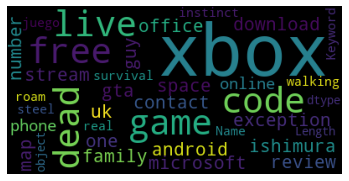

In [15]:
A=str(Keyword_id_info['Keyword'])



import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


wordcloud = WordCloud(relative_scaling = 1,
                      stopwords = set(STOPWORDS)
                      ).generate(A)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


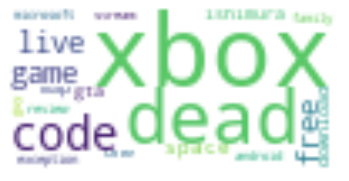

In [16]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#Then we enter the following code
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=30,
               random_state=42, width=100, height=50)


wc.generate(A)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
A=str(Keyword_id_info['Keyword'])
A

'0                         dead space ishimura map\n1                    gta 5 xbox one download code\n2                          stream xbox to android\n3                         the only exception live\n4                     family guy xbox game review\n                           ...                   \n44834          microsoft office contact number uk\n44835                          online phone games\n44836                        free xbox live codes\n44837    walking dead survival instinct free roam\n44838                          real steel 2 juego\nName: Keyword, Length: 44839, dtype: object'

In [17]:
B=A[:15]
Player_list=B.Keyword.to_list()
Player=Player_list[:1]

# Reorder it following the values:
ordered_df = B.sort_values(by='Count')
my_range=range(1,len(B.index)+1)


# Create a color if the group is "B"
my_color=np.where(B['Keyword'].isin(Player), 'yellow', 'skyblue')
my_size=np.where(B['Keyword'].isin(Player), 70, 30)
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.rcParams['axes.facecolor'] = 'teal'
plt.hlines(y=my_range, xmin=0, xmax=B['Count'], color=my_color, alpha=0.4)
plt.scatter(B['Count'], my_range, color=my_color, s=my_size, alpha=1)

# Add title and exis names
plt.yticks(my_range, B['Keyword'])
plt.title("What the commonly occuring Keywords?", loc='left')
plt.xlabel('Number of Keyword Occurences')
plt.ylabel('Keywords')

AttributeError: 'str' object has no attribute 'Keyword'

In [420]:
Keyword_id_info

Keyword_id                                 Keyword  \
0      562035390               halo 4 reach release date   
1         160000                   xbox account recovery   
2         731010  how to add playstation players on xbox   
3         569000         halo 2 anniversary master chief   
4       29373300           can you sell cars in nfs heat   
...          ...                                     ...   
44834      10000                         xbox gamer girl   
44835   24659200             black desert ps4 beta error   
44836   29379031  can you connect headphones to xbox 360   
44837   19353900                  destiny 3 release date   
44838     560000                          halo nightfall   

                              Keyword_ordered  
0                   4 date halo reach release  
1                       account recovery xbox  
2      add how on players playstation to xbox  
3             2 anniversary chief halo master  
4               can cars heat in nfs sell you  
...                                       ...  
44834                         gamer girl xbox  
44835             beta black desert error ps4  
44836  360 can connect headphones to xbox you  
44837                  3 date destiny release  
44838                          halo nightfall  

[44839 rows x 3 columns]

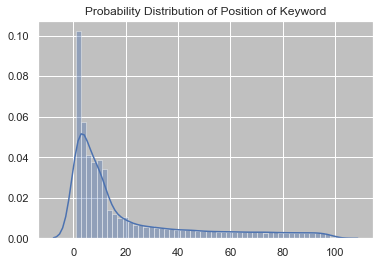

In [459]:
import matplotlib.pyplot as plt 

#A.Count.plot.hist()
import seaborn as sns
x=A.Count

sns.distplot(Y).set_title('Probability Distribution of Position of Keyword')
plt.rcParams['axes.facecolor'] = 'silver'
#A.Keyword.plot.hist(bins=3, alpha=0.5)

In [314]:

# Define Features (which rows should the ml algorithm should consider for learning)
features = ["Keyword Difficulty","CPC","Traffic","Competition","URL_ID","Keyword_id","Traffic Cost","Number of Results",
            "Search Volume"]
# Define Target (What should be predicted)
target = ["Position"]

# split into input (X) and output (Y) variables
X = Dataset_sorted2[features]
Y = Dataset_sorted2[target]

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LR: 0.115714 (0.006060)


C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\ven

LDA: 0.118457 (0.005605)


C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

KNN: 0.089543 (0.004923)


C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



CART: 0.409029 (0.010154)


C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

NB: 0.022057 (0.004074)


C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

SVM: 0.118171 (0.004834)


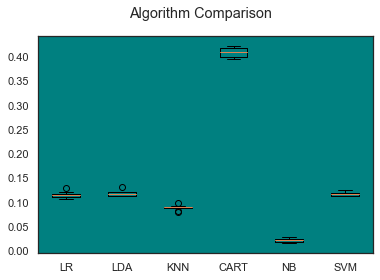

In [439]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('CART1',DecisionTreeRegressor())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    


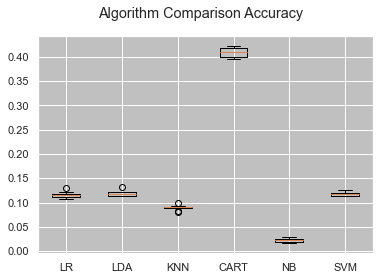

In [450]:
# boxplot algorithm comparison
fig = plt.figure()
plt.rcParams['axes.facecolor'] = 'silver'
fig.suptitle('Algorithm Comparison Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#plt.ylim(`[0.5,0.9])
plt.show()

In [449]:
results

[array([0.11085714, 0.11542857, 0.11771429, 0.11714286, 0.12114286,
        0.12971429, 0.11314286, 0.10742857, 0.10971429, 0.11485714]),
 array([0.11257143, 0.11542857, 0.12114286, 0.11657143, 0.12171429,
        0.13257143, 0.11428571, 0.11714286, 0.11314286, 0.12      ]),
 array([0.088     , 0.09142857, 0.09085714, 0.09142857, 0.08971429,
        0.09257143, 0.08857143, 0.09942857, 0.08114286, 0.08228571]),
 array([0.39771429, 0.41485714, 0.39828571, 0.40457143, 0.42228571,
        0.41942857, 0.42285714, 0.41371429, 0.39657143, 0.4       ]),
 array([0.024     , 0.02228571, 0.016     , 0.01771429, 0.02228571,
        0.02742857, 0.02857143, 0.01942857, 0.01771429, 0.02514286]),
 array([0.11885714, 0.11257143, 0.11428571, 0.11885714, 0.12685714,
        0.12571429, 0.11828571, 0.12      , 0.11314286, 0.11314286])]

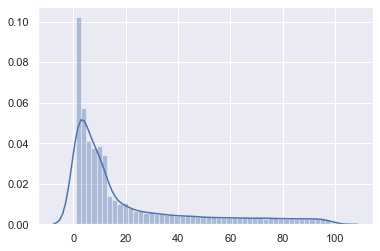

In [440]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

sns.distplot(Y);

In [ ]:
sns.distplot(y_test);

In [351]:
#bins = [0,5,10,15,20,40,60,70,100]
#Y['Position1'] = np.searchsorted(bins, Y['Position'].values)
#Labels=Y
#Y=Y[['Position1']]


# Define Features (which rows should the ml algorithm should consider for learning)
features = ["CPC","Traffic","URL_ID","Keyword_id","Traffic Cost","Number of Results"
            ,"Keyword Difficulty","Competition","Search Volume"]
# Define Target (What should be predicted)
target = ["Position"]

# split into input (X) and output (Y) variables
X = Dataset_sorted2[features]
Y = Dataset_sorted2[target]

# Normalize feature data
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.35, random_state = 3)



In [352]:
# Step 2: Make an instance of the Model
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X, Y)
print(clf.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=15)


In [355]:
clf=DecisionTreeClassifier(max_depth=30)

# Step 3: Train the model on the data
clf.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
y_pred_test=clf.predict(X_test)

# Step 5: Predict labels of the whole dataset
y_pred=clf.predict(X)

# Step 6: Predict labels of the training set
y_pred_train=clf.predict(X_train)


#Accuracy,f1_score,recall_score
#recall_score=recall_score(y_test, y_pred,average='macro')
from sklearn.metrics import accuracy_score
accuracy_score1=accuracy_score(y_test, y_pred_test)
accuracy_score2=accuracy_score(Y, y_pred)
accuracy_score3=accuracy_score(y_train, y_pred_train)
#f1_score=f1_score(y_test, y_pred,average='macro')
print('Accuracy Score of the test set: %.3f' % accuracy_score1)
print('Accuracy Score of the whole set: %.3f' % accuracy_score2)
print('Accuracy Score of the training set: %.3f' % accuracy_score3)


Accuracy Score of the test set: 0.416
Accuracy Score of the whole set: 0.754
Accuracy Score of the training set: 0.936


In [356]:
Y

Position
0            34
1            11
2            84
3             9
4             9
...         ...
49995        17
49996        44
49997        11
49998        46
49999         8

[50000 rows x 1 columns]

In [358]:
y_pred=pd.DataFrame(y_pred)
y_pred1=y_pred.set_axis(['Optimised Position'],axis=1, inplace=False)

Dataset_sorted3=pd.merge(Dataset_sorted8,y_pred1,left_index=True, right_index=True)
#Dataset_sorted4=pd.merge(Dataset_sorted3,Y,left_index=True, right_index=True)
Dataset_sorted3['Check']=np.where((Dataset_sorted3.Position!=Dataset_sorted3['Optimised Position']),1,0)

In [34]:
###### look at the Correlation between Position and other variables ###########

corr = Dataset_sorted.corr()["Position"]
corr

Position              1.000000
Previous position     0.976132
Search Volume        -0.002647
Keyword Difficulty   -0.212062
CPC                  -0.001677
Traffic              -0.023524
Traffic (%)          -0.018314
Traffic Cost         -0.010539
Competition          -0.192022
Number of Results     0.103226
Timestamp             0.001136
Name: Position, dtype: float64

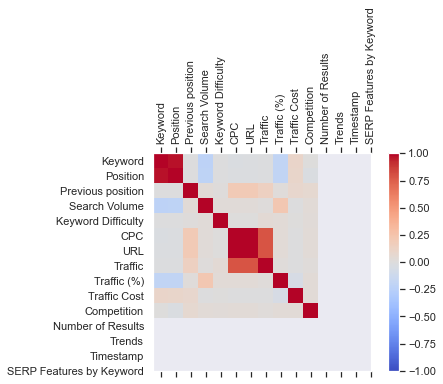

In [35]:
###### look at the Correlation Matrix ###########
corr = Dataset_sorted.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Dataset_sorted.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Dataset_sorted.columns)
ax.set_yticklabels(Dataset_sorted.columns)
plt.show()

In [ ]:
from scipy.stats import wilcoxon
import random

Keyword=random.sample(list(Dataset_sorted['Keyword Difficulty']), 40000)  
Position=random.sample(list(Dataset_sorted['CPC']), 40000)
# compare samples
stat, p = wilcoxon(Keyword, Position)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
    
#Using Adaptive Binning for Deposit Quantity
quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
quantiles = Dataset_sorted['Position'].quantile(quantile_list)
Dataset_sorted['Position1'] = pd.qcut(Dataset_sorted['Position'],q=quantile_list,labels=quantile_labels,duplicates='drop')

#Using Adaptive Binning for Deposit Quantity
quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
quantiles = Dataset_sorted['Keyword Difficulty'].quantile(quantile_list)
Dataset_sorted['Keyword Difficulty1'] = pd.qcut(Dataset_sorted['Keyword Difficulty'],q=quantile_list,labels=quantile_labels)

#Deposit Quantity Frequency vs VIP
Dataset_sorted_crosstab = pd.crosstab(Dataset_sorted['Keyword Difficulty1'],Dataset_sorted['Position1'])
Dataset_sorted_crosstab.plot.bar()
plt.show()

sns.relplot(x="Search Volume", y="CPC", hue="Keyword Difficulty1",
            col="Position1", data=Dataset_sorted);

#Dataset_sorted['CPC'].plot.hist(bins=2, alpha=0.5,range=(0,250))

print(max(Dataset_sorted['CPC']))
print(min(Dataset_sorted['CPC']))
print(np.var(Dataset_sorted['CPC'],ddof=1))

print(max(Dataset_sorted['Keyword Difficulty']))
print(min(Dataset_sorted['Keyword Difficulty']))
print(np.var(Dataset_sorted['Keyword Difficulty'],ddof=1))

##### Visualize the dataset to see which variable is most important for keywords: Position

Dataset_sorted.Position.plot.hist(bins=3, alpha=0.5)

Dataset_sorted['Keyword Difficulty'].plot.hist(bins=12, alpha=0.5)



KMeans(max_iter=100, n_clusters=5, n_init=1)

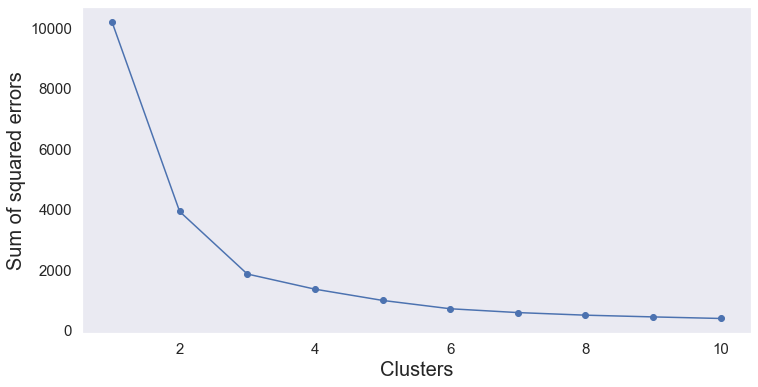

In [332]:
#K means Clustering

from sklearn import preprocessing

x = Dataset_sorted2.values #returns a numpy array
min_max_scaler = MinMaxScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

###We need to reduce all the 74 dimensions of the X_norm dataframe into 2, so will use PCA to do this.
###This essentially turns a set of correlated features into a set of linearly uncorrelated ones, 
### capturing the greatest variablity between features. Of course now, the 2 PCA dimensions on 
## their own are fairly meaningless


pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

var=pca.explained_variance_ratio_

X_norm1=X_norm.iloc[:,:-2]

#One major factor to consider in K-means clustering is the number of clusters the final grouping should have.
#One method to determine this is via the 'elbow method'. 
##Essentially plotting number of clusters against the sum of squared errors. 
### A good number of clusters to choose is at the plot's "elbow" - the point where adding another cluster 
## doesn't reduce the sum of squared errors too much. 
#It gives a fairly good approximation but is not foolproof, so knowledge of the data helps with this too

cluster_range = range(1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( transformed )
    cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

#Plotting the number of clusters using the elbow method

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show(


In [ ]:
sns.set(style="dark")
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.tick_params(labelsize=15)

plt.xlabel("Clusters", fontsize=20)
plt.ylabel("Sum of squared errors", fontsize=20)

In [333]:

############## Vectorizer for Keywords ####################

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents=Dataset_sorted1['Keyword']
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(documents)

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

#Examining the "elbow" and after a few few trial-and-error runs, 5 clusters should be appropriate
#Perform K-means clustering on the PCA reduced dataframe, with 5 clusters:

# Number of clusters
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()


order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
A=[]
B=[]
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
        B.append(terms[ind])
        A.append(i)




#Target=prediction


Cluster 0:
 minecraft
 pc
 microsoft
 fortnite
 release
 duty
 online
 date
 black
 halo
Cluster 1:
 xbox
 360
 controller
 live
 gold
 black
 play
 connect
 store
 wireless
Cluster 2:
 download
 forza
 horizon
 free
 xbox
 pc
 digital
 360
 game
 windows
Cluster 3:
 games
 xbox
 360
 play
 free
 best
 pc
 gold
 online
 2019
Cluster 4:
 game
 pass
 xbox
 pc
 ultimate
 video
 games
 new
 360
 online


In [ ]:
#One major factor to consider in K-means clustering is the number of clusters the final grouping should have.
#One method to determine this is via the 'elbow method'. Essentially plotting number of clusters against the sum of squared errors. A good number of clusters to choose is at the plot's "elbow" - the point where adding another cluster doesn't reduce the sum of squared errors too much. 
#It gives a fairly good approximation but is not foolproof, so knowledge of the data helps with this too

cluster_range = range(1, 11)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(X)
    cluster_errors.append( clusters.inertia_ )


#Plotting the number of clusters using the elbow method

sns.set(style="dark")
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.tick_params(labelsize=15)

plt.xlabel("Clusters", fontsize=20)
plt.ylabel("Sum of squared errors", fontsize=20)
#Plotting the number of clusters using the elbow method

In [359]:
###### Which keywords would you choose to optimize?
Cluster=model.labels_.tolist()
Cluster1=pd.DataFrame(Cluster).set_axis(['Cluster'], axis=1, inplace=False)
Dataset_final=pd.merge(Dataset_sorted3,Cluster1,left_index=True, right_index=True)
Subset=Dataset_final[Dataset_final['Check']==1]
#Dataset1.head(10)
Subset=Subset.sort_values(['Optimised Position','Cluster','URL_ID','Keyword_id'], ascending=[True,True,True,True])
Subset

Keyword  Position  Previous position  \
40939                   x box one s         2                  0   
17101                       gears 5         2                  2   
25948    microsoft enforcement team         3                  3   
37961                      tv pluzz         3                  3   
8641                   cbox expired         3                  3   
...                             ...       ...                ...   
7321          call to arms download        33                 33   
24955  lost head game free download        26                 26   
16425        game consoles for kids        53                 53   
26690               minecraft at at        22                 22   
303                      2019 rings        48                 48   

       Search Volume  Keyword Difficulty   CPC  \
40939           5400               94.69  1.48   
17101          27100               91.04  1.57   
25948             70               81.91  0.00   
37961             70               74.33  0.00   
8641              70               83.73  0.00   
...              ...                 ...   ...   
7321              50               68.47  0.00   
24955             70               68.58  0.00   
16425           1300               76.34  0.27   
26690            110               98.79  0.00   
303               70               79.94  0.00   

                                                     URL  Traffic  \
40939   https://www.xbox.com/en-GB/consoles/all-consoles      702   
17101           https://www.xbox.com/en-GB/games/gears-5     3523   
25948            https://enforcement.xbox.com/home/howto        1   
37961  https://support.xbox.com/mt-MT/xbox-360/apps/f...        1   
8641   https://support.xbox.com/help/subscriptions-bi...        1   
...                                                  ...      ...   
7321   https://marketplace.xbox.com/en-us/Product/Cal...        0   
24955  https://news.xbox.com/en-us/2020/05/27/sea-of-...        0   
16425  https://www.xbox.com/en-US/xbox-one-s/family-e...        0   
26690         https://www.xbox.com/en-US/games/minecraft        0   
303    https://news.xbox.com/en-us/2019/08/16/xbox-in...        0   

       Traffic (%)  Traffic Cost  Competition  Number of Results  \
40939         0.02          1038         1.00         8360000000   
17101         0.11          5531         0.62          149000000   
25948         0.00             0         0.00           36800000   
37961         0.00             0         0.00                 41   
8641          0.00             0         0.00             418000   
...            ...           ...          ...                ...   
7321          0.00             0         0.00          394000000   
24955         0.00             0         0.00          366000000   
16425         0.00             0         1.00           53700000   
26690         0.00             0         0.05          667000000   
303           0.00             0         0.00          909000000   

                                         Trends   Timestamp  \
40939    [13,16,20,16,20,24,30,100,55,24,16,36]  1594741142   
17101         [5,5,13,13,20,100,20,13,16,7,5,9]  1594697770   
25948    [14,29,14,43,14,71,71,100,14,43,29,14]  1594636659   
37961    [14,14,29,100,43,14,57,14,14,43,14,29]  1593279603   
8641           [60,100,20,20,0,0,0,0,20,0,0,80]  1592919570   
...                                         ...         ...   
7321      [25,100,75,25,25,25,25,0,25,25,25,75]  1593900151   
24955            [33,0,0,0,0,0,33,0,100,0,0,33]  1594590145   
16425     [9,13,13,16,20,28,44,100,81,28,20,36]  1594672511   
26690  [10,14,19,33,52,52,33,33,100,100,67,100]  1593636274   
303        [14,14,29,14,100,71,14,14,14,71,0,0]  1593826820   

                                SERP Features by Keyword Keyword_id   URL_ID  \
40939  Top stories, Image pack, Site links, Reviews, ...    2723800   418235   
17101  Knowledge panel, Site links, Reviews, Vi

In [361]:
Dataset_sorted3.Check.value_counts(normalize=True)

0    0.75372
1    0.24628
Name: Check, dtype: float64

In [ ]:
transformed.columns = ['x','y']
x=transformed.x
y=transformed.y

In [380]:

transformed['cluster'] = Cluster
transformed['Keyword'] = list(documents)
transformed['position'] = Y
transformed['Optimised_position'] = y_pred
transformed['Check']=np.where((transformed.position!=transformed['Optimised_position']),1,0)

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Probability Distribution of Clusters amongst optimized keywords')

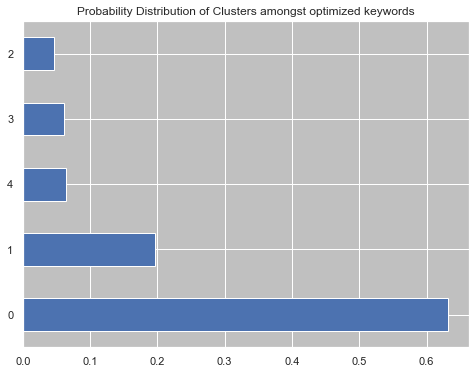

In [464]:
Check=transformed[transformed['Check']==1]
Check['Position_Status']=np.where(Check.position<Check['Optimised_position'],'Position Downgrade','Position Upgrade')
Check.cluster.value_counts(normalize=True).plot(kind='barh', figsize=(8, 6))
plt.title('Probability Distribution of Clusters amongst optimized keywords')

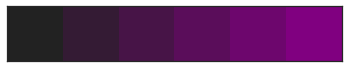

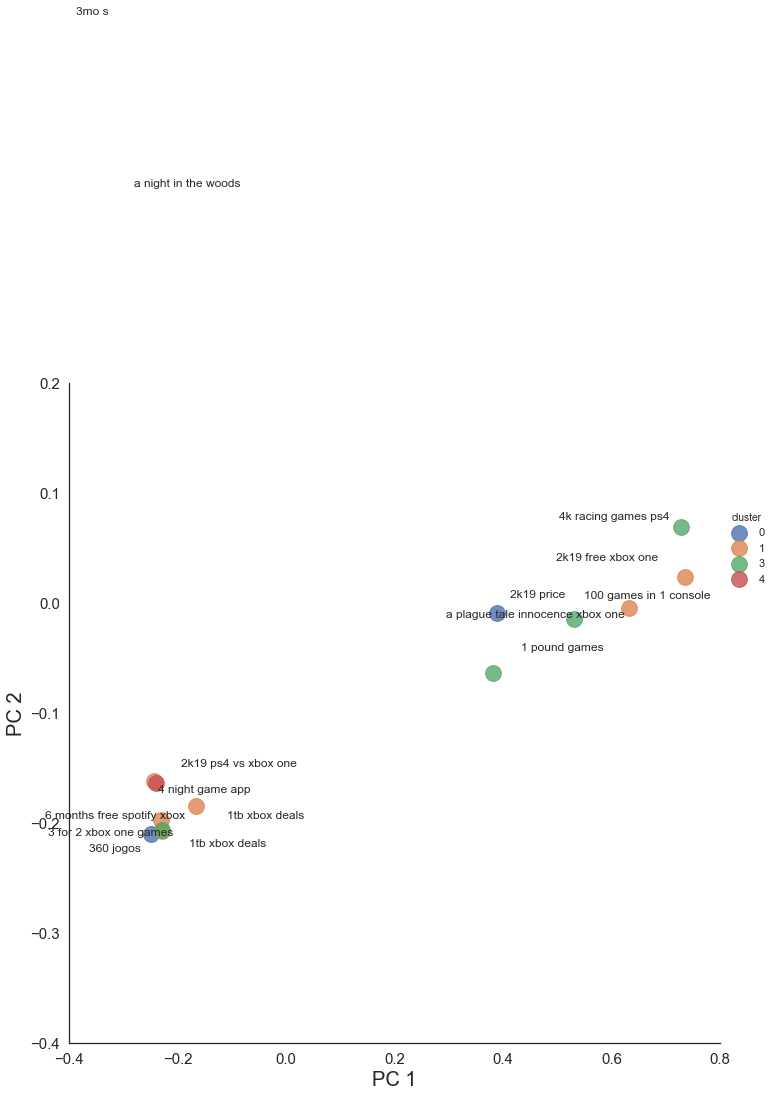

In [467]:
from adjustText import adjust_text
#Similar cluster and position: Sort by Overall Rating
cluster1=Check[Check['Optimised Position']<=5]

#Top 100 players for Cluster=4 and Position==LW
cluster2=cluster1[:15]

sns.set(style="white")
pal =  sns.palplot(sns.dark_palette("purple"))

ax = sns.lmplot(x="x", y="y",hue='cluster', data=cluster2, legend=True,
                   fit_reg=False, height =10, scatter_kws={"s": 250}, palette=pal)

texts = []
for x, y, s in zip(cluster2.x, cluster2.y, cluster2.Keyword):
    texts.append(plt.text(x, y, s))
    adjust_text(texts) #, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))  # uncomment to add arrows to labels

#ax._legend.set_title(prop={fontsize:'15'})
ax.set(ylim=(-0.4, 0.2))
ax.set(xlim=(-0.4, 0.8))
#plt.legend(numpoints=1) 
plt.tick_params(labelsize=15)
#plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()
# ax.savefig("newc_man_kmeans.jpg")

In [ ]:
from adjustText import adjust_text
#Similar cluster and position: Sort by Overall Rating
cluster1=Check[Check['Optimised Position']<=5]

#Top 100 players for Cluster=4 and Position==LW
cluster2=cluster1[:15]

sns.set(style="white")
pal =  sns.palplot(sns.dark_palette("purple"))

ax = sns.lmplot(x="x", y="y",hue='cluster', data=cluster2, legend=True,
                   fit_reg=False, height =10, scatter_kws={"s": 250}, palette=pal)

texts = []
for x, y, s in zip(cluster2.x, cluster2.y, cluster2.Keyword):
    texts.append(plt.text(x, y, s))
    adjust_text(texts) #, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))  # uncomment to add arrows to labels

#ax._legend.set_title(prop={fontsize:'15'})
ax.set(ylim=(-0.4, 0.2))
ax.set(xlim=(-0.4, 0.8))
#plt.legend(numpoints=1) 
plt.tick_params(labelsize=15)
#plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()
# ax.savefig("newc_man_kmeans.jpg")